In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter
from math import pi

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Import dataset

In [8]:
data = '/content/csny.csv'
df = pd.read_csv(data)
df

track  \
0                                       Chicago (CSNY)   
1                             Find the Cost of Freedom   
2                                King Midas in Reverse   
3                                               Medley   
4                                          Ohio (CSNY)   
5                               Right Between the Eyes   
6                                  A Letter Home Intro   
7                                              Changes   
8                                                Crazy   
9                                   Early Morning Rain   
10                          I Wonder If I Care as Much   
11                           If You Could Read My Mind   
12                                         My Hometown   
13                                     Needle of Death   
14                                   On the Road Again   
15                                Since I Met You Baby   
16                                 After the Gold Rush   
17                                               Birds   
18                                 Cripple Creek Ferry   
19                         Don't Let It Bring You Down   
20                                    I Believe in You   
21                                     Oh, Lonesome Me   
22                                        Southern Man   
23                                         Tell Me Why   
24                              Till the Morning Comes   
25                                     After the Storm   
26                                            Bad Boyz   
27                                              Camera   
28                                        Find a Dream   
29                                          In My Life   
30                                    It Won't Go Away   
31                                Only Waiting for You   
32                                              Panama   
33                                   Street to Lean On   
34                                    These Empty Days   
35                                      Till It Shines   
36                          Barrel of Pain (Half Life)   
37                                           Blackbird   
38                        He Played Real Good for Free   
39                                      American Dream   
40                                    Clear Blue Skies   
41                                             Compass   
42                                   Don't Say Goodbye   
43                                         Got It Made   
44                                        Name of Love   
45                                          Night Song   
46                              Nighttime for Generals   
47                                          Shadowland   
48                                   Soldiers of Peace   
49                                           That Girl   
50                                      This Old House   
51                                  Anticipatory Crowd   
52                                             Deja Vu   
53                                         Exit Sounds   
54                                           Guinevere   
55                                           Lee Shore   
56                                 Teach Your Children   
57                                               Triad   
58                                 Democratic Liberals   
59                                   Deterring Nuclear   
60                                       Devised Plans   
61                                          Heaviosity   
62                                        Late Bloomer   
63                                           Never War   
64                                         On Thatcher   
65                            Recording Southern Cross   
66                                      Senator Stills   
67                               A Dream That Can Last   
68                                             

In [9]:
# Remove NaN
df = df.fillna('')

### **Hypothesis 1: Over the decades, the length of songs has changed significantly.**
Over the decades, the length of songs has significantly changed, influenced by both artistic trends and technological advancements. Song durations in the late 1960s and 1970s often exceeded the typical 3-minute radio format, allowing them to explore more complex arrangements and extended instrumental sections. However, by the 1980s, songs generally became shorter due to the rise of commercial radio and MTV, favoring more radio-friendly tracks. Today, with the influence of streaming platforms, there is a renewed trend toward shorter songs.

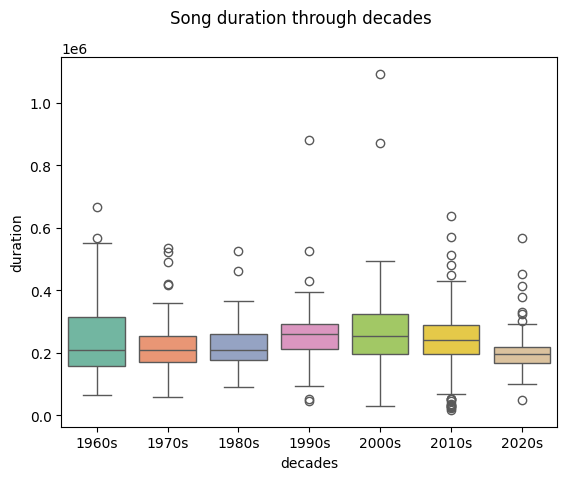

In [10]:
df[['duration', 'release_date']]

# extract year from 'release_date'
release_year = df['release_date'].str.slice(0,4)

# create decades
decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

# if the year in release_date starts with 196_ put it in decade 1960, and so on.
def create_decade(year):
  if year.startswith('196'):
    return '1960s'
  elif year.startswith('197'):
    return '1970s'
  elif year.startswith('198'):
    return '1980s'
  elif year.startswith('199'):
    return '1990s'
  elif year.startswith('200'):
    return '2000s'
  elif year.startswith('201'):
    return '2010s'
  elif year.startswith('202'):
    return '2020s'

df['decades'] = release_year.apply(create_decade)

# create the plot
figure = plt.figure()
figure.suptitle('Song duration through decades')
sns.boxplot(data=df, x='decades', y='duration', palette='Set2', order=decades)
plt.show()

### **Conclusion**
From the graph, it is evident that songs had the longest durations during the **1960s**, which is followed by an extreme drop in the **1970s**, and then exhibiting a relatively symmetrical trend of increasing durations from the **1970s** to the **2000s**. Following this peak, there is a noticeable decline in song durations from the **2000s** to the **2020s**. Additionally, the data reveals a significant number of outliers, predominantly positioned above the boxplot, which suggests that there may be present extended versions of songs, band introductions on concerts, or even interview parts. Also, it is noticeable that the most songs were published in the **1960s**, but there is also a significant number of songs in the **2000s**, indicating that there may be albums representing various anniversaries and archives in the dataset. In conclusion, the song duration has changed drastically over time, so the **Hypothesis 1** can be accepted.

### **Hypothesis 2**: Over decades, musical styles have overlapped and evolved significantly.
Bands like **Crosby, Stills, Nash & Young (CSNY)** influenced these processes of change, combining folk, rock and politically engaged lyrics, while later musical trends continued this tradition of experimentation, reflecting wider social changes and technological advances in music production.

In [11]:
album_styles = df['album_styles']
styles = []
unique_styles = []

# split album styles
for album_style in album_styles:
  styles.extend(str(album_style).split(', '))

# find unique styles
for style in styles:
  if style not in unique_styles:
    unique_styles.append(style)

# create subset from df, add unique styles as columns
decades_and_styles = df[['decades', 'album_styles']].copy()

# add binary columns for each style
for style in unique_styles:
    decades_and_styles[str(style)] = df['album_styles'].apply(lambda x: style in x)

# remove empty style
unique_styles.remove('')

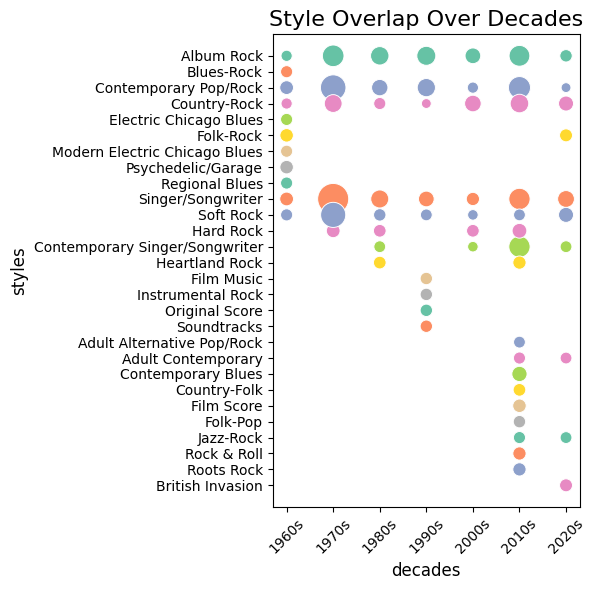

In [12]:
# Unmelt dataframe to have one row per (decade, style) pair
melted_df = decades_and_styles.melt(id_vars=['decades'],
                                     value_vars=unique_styles,
                                     var_name='style',
                                     value_name='present')

# Filter only rows where the style is present
melted_df = melted_df[melted_df['present'] == True]

# Count occurrences of each style per decade
style_count = melted_df.groupby(['decades', 'style']).size().reset_index(name='count')

# Order decades properly
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
style_count['decades'] = pd.Categorical(style_count['decades'], categories=decade_order, ordered=True)

# Create the scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=style_count, x='decades', y='style', size='count', hue='style', sizes=(50, 500), palette='Set2', marker='o', legend=False)

# Customize the plot
plt.title('Style Overlap Over Decades', fontsize=16)
plt.xlabel('decades', fontsize=12)
plt.ylabel('styles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### **Conclusion**
From the graph it can be seen that certain styles are represented in relatively equal measure throughout all decades, such as **Album Rock**, **Contemporary Pop/Rock**, **Country-Rock**, **Singer/Songwriter** and **Soft Rock**. More significant overlaps exist between styles such as **Contemporary Pop/Rock** and **Country Rock**, **Singer/Songwriter** and **Soft Rock**. Also, a couple of inconsistencies can be observed, such as the presence of the **British Invasion** in the **2020s**, which is practically impossible, considering that period was popular during the **1960s**. After reviewing this specific case, it was found that it was the ***Now*** album by **Graham Nash**, and that the data was most likely mislabeled at its source, which is **AllMusic**. In general, there are many variations of one genre, such as **Rock** or **Blues**, which survived over the decades, but changed their style, so **Hypothesis 2** can be accepted as a true.

### **Hypothesis 3**: The band's popularity increased significantly after the inclusion of Neil Young.
This hypothesis suggests that the inclusion of Neil Young had a big impact on the band's success. Neil Young officially joined **Crosby, Stills, & Nash** in **1969**, turning the group into **Crosby, Stills, Nash & Young (CSNY)**. His addition brought a distinctive sound and depth to the band, helping to expand their appeal and artistic reach. Many of their most iconic albums and performances, such as **Déjà Vu (1970)**, came after his arrival, contributing to a significant rise in their popularity.

In [13]:
dc_tracks = df[df['artist'] == 'David Crosby'] # Select all tracks where artist is specified
dc_avg_popularity = dc_tracks['popularity'].mean() # Calculate average popularity score for artist
ss_tracks = df[df['artist'] == 'Stephen Stills']
ss_avg_popularity = ss_tracks['popularity'].mean()
gn_tracks = df[df['artist'] == 'Graham Nash']
gn_avg_popularity = gn_tracks['popularity'].mean()
ny_tracks = df[df['artist'] == 'Neil Young']
ny_avg_popularity = ny_tracks['popularity'].mean()
sy_tracks = df[df['artist'] == 'The Stills-Young Band']
sy_avg_popularity = sy_tracks['popularity'].mean()
cn_tracks = df[df['artist'] == 'Crosby & Nash']
cn_avg_popularity = cn_tracks['popularity'].mean()
csn_tracks = df[df['artist'] == 'Crosby, Stills & Nash']
csn_avg_popularity = csn_tracks['popularity'].mean()
csny_tracks = df[df['artist'] == 'Crosby, Stills, Nash & Young']
csny_avg_popularity = csny_tracks['popularity'].mean()

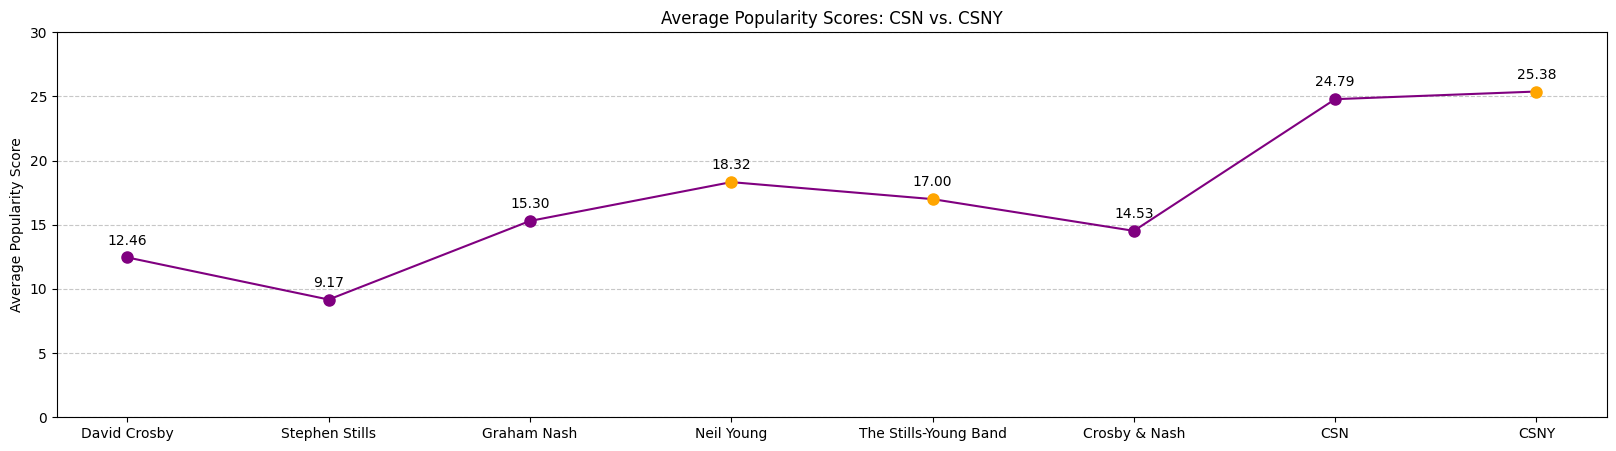

In [14]:
labels = ['David Crosby', 'Stephen Stills', 'Graham Nash', 'Neil Young', 'The Stills-Young Band', 'Crosby & Nash', 'CSN', 'CSNY'] # label the data
scores = [dc_avg_popularity, ss_avg_popularity, gn_avg_popularity, ny_avg_popularity, sy_avg_popularity, cn_avg_popularity, csn_avg_popularity, csny_avg_popularity] # add a list of average scores

plt.figure(figsize=(20,5))
colors = ['purple' if label not in ['Neil Young', 'The Stills-Young Band', 'CSNY'] else 'orange' for label in labels] # mark the dots in orange if neil young is present
plt.plot(labels, scores, 'o-', color='purple', label='Others')

for i, score in enumerate(scores):
    plt.plot(labels[i], score, 'o', color=colors[i], markersize=8) # add label and its corresponding score, selected color and size of the dot

highlight_indices = [3, 4, 6]
highlight_labels = ['Neil Young', 'The Stills-Young Band', 'CSNY']
highlight_scores = [scores[i] for i in highlight_indices]

plt.title('Average Popularity Scores: CSN vs. CSNY')
plt.ylabel('Average Popularity Score')
plt.ylim(0, 30)

for index, value in enumerate(scores):
    plt.text(index, value + 1, f'{value:.2f}', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Conclusion**
The average popularity rating for each artist is represented by a purple dot, while the yellow dots mark the popularity ratings of the bands in which Neil Young was a member. It is evident that Neil Young has the highest rating (18.32) among all individual artists, even the band **The Stills-Young** shows a higher rating than the solo artists (17). On the other hand, the difference in popularity between **Crosby, Stills & Nash (CSN)** (24.79) and **Crosby, Stills, Nash & Young (CSNY)** (25.38) is almost negligible, although present. While it is clear that Neil Young may be the most talented member of the group, **Hypothesis 3** is rejected, as the difference in popularity is not significant enough.

### **Hypothesis 4**: There are significant correlations between numerous *Spotify* audio features of tracks and popularity score
By analyzing data on audio characteristics and popularity, it is possible to see patterns that indicate that certain elements of the sound can influence how popular a song is. For example, songs with higher energy levels and faster tempos might have a better chance of becoming hits. A statistical analysis conducted could confirm or reject this hypothesis, providing a deeper understanding of the relationship between music and popularity.

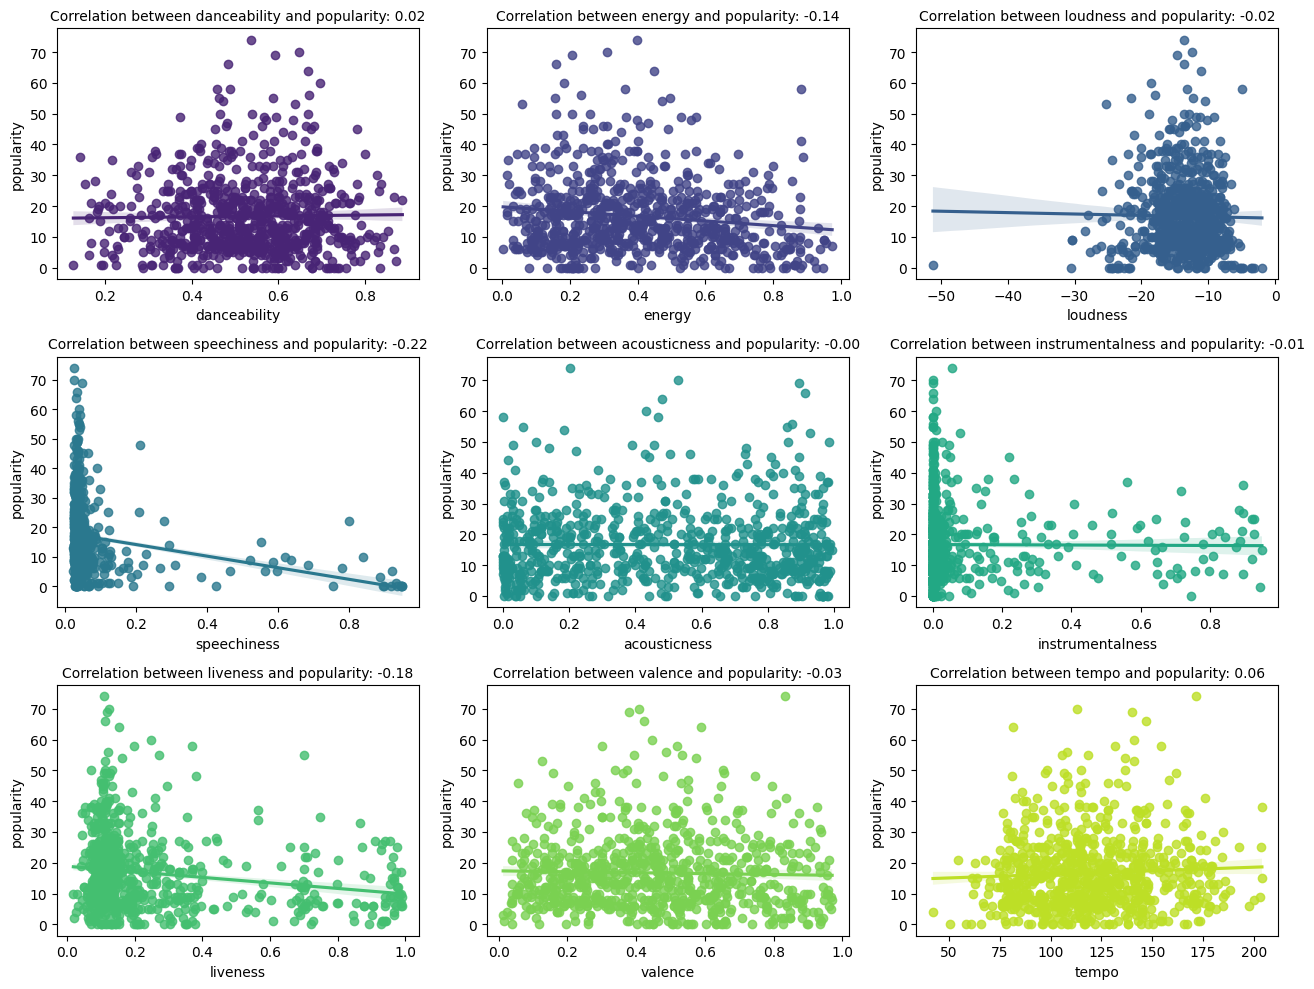

In [15]:
# List of features
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo']

# Number of features
n = len(features) - 1

plt.figure(figsize=(13, 10))

color_palette = sns.color_palette("viridis", n_colors=n)

# Creation of scatter plots
for i in range(1, len(features)):
    plt.subplot(3, 3, i)  # 3x3 network
    sns.regplot(x=df[features[i]], y=df['popularity'], color=color_palette[i-1])
    if i == 0:
      continue
    correlation = np.corrcoef(df[features[i]], df['popularity'])[0, 1]
    plt.title(f'Correlation between {features[i]} and popularity: {correlation:.2f}', fontsize=10)
    plt.xlabel(features[i])
    plt.ylabel('popularity')

plt.tight_layout()
plt.show()

### **Conclusion**
Given that all correlation values ​​are close to zero, it can be concluded that there is no strong relationship between the popularity of the song and its audio characteristics, so the **Hypothesis 4** can be rejected.

### **Hypothesis 5**: There are significant differences between the solo and group work of artists in the form of feelings, moods and themes they cover in their songs.
Solo work tends to explore personal emotions and intimate themes, resulting in more introspective and emotional songs. Themes like love, loss, and identity frequently emerge in this context. In contrast, group work encourages a broader exploration of topics, often emphasizing social problems, political messages, or shared life experiences.

In [16]:
def create_radar_charts(artist_name, mood_mapping, color):
  artist_name = artist_name.strip()

  # Filter dataset for the artist
  albums = df[df['artist'].str.lower() == artist_name.lower()]

  # Remove NaN values
  album_moods = albums['album_moods'].replace('', float('NaN')).dropna()
  moods = []

  # split album styles
  for album_mood in album_moods:
    moods.extend(str(album_mood).split(', '))

  grouped_moods = Counter() # Group moods to calculate number of occurences
  for mood in moods:
      for group, items in mood_mapping.items():
          if mood in items:
              grouped_moods[group] += 1
              break

  labels = list(grouped_moods.keys())
  frequencies = list(grouped_moods.values())

  num_vars = len(labels)

  angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() # Create angles for radar chart

  frequencies += frequencies[:1]
  angles += angles[:1]

  fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

  ax.fill(angles, frequencies, color=color, alpha=0.9)
  ax.plot(angles, frequencies, color=color, linewidth=2)

  ax.set_yticklabels([])
  ax.set_xticks(angles[:-1])
  labeled_angles = [f"{i+1}. {label}" for i, label in enumerate(labels)]
  ax.set_xticklabels(labeled_angles, fontsize=11.5)
  ax.tick_params(axis='x', rotation = 45, pad=38)

  plt.title(f"{artist_name}", size=15, color='black', y=1.2, pad=25)

  plt.show()

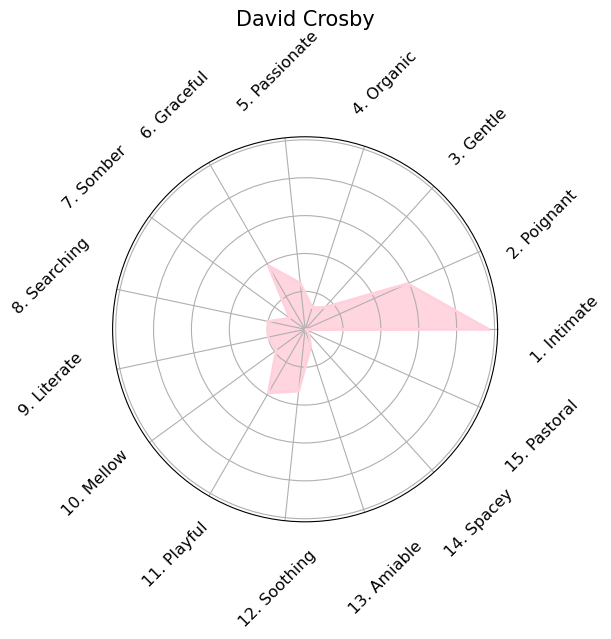

In [17]:
# Manually examine and group individual moods based on their similarity
mood_mapping_dc = {
    "Intimate": ["Intimate", "Sentimental", "Bittersweet", "Melancholy", "Self-Conscious", "Reflective", "Introspective"],
    "Mellow": ["Laid Back/Mellow", "Relaxed", "Meandering", "Calm/Peaceful", "Atmospheric"],
    "Soothing": ["Earthy", "Warm", "Autumnal", "Soothing"],
    "Gentle": ["Gentle", "Sweet", "Smooth"],
    "Poignant": ["Poignant", "Earnest"],
    "Organic": ["Organic"],
    "Pastoral": ["Pastoral"],
    "Passionate": ["Passionate", "Wistful"],
    "Playful": ["Fun", "Summery", "Playful", "Uplifting", "Sprightly"],
    "Amiable": ["Agreeable", "Amiable/Good Natured"],
    "Graceful": ["Refined", "Graceful", "Melodic", "Flowing"],
    "Somber": ["Somber", "Plaintive"],
    "Searching": ["Brooding", "Searching"],
    "Spacey": ["Spacey"],
    "Literate": ["Literate", "Lyrical"]
}
create_radar_charts('David Crosby', mood_mapping_dc, color = '#FFD1DC')

### **Conclusion**
It can be seen that David Crosby deals mostly with intimate and sad moods, which makes sense, given that it was known he had problems with addiction.

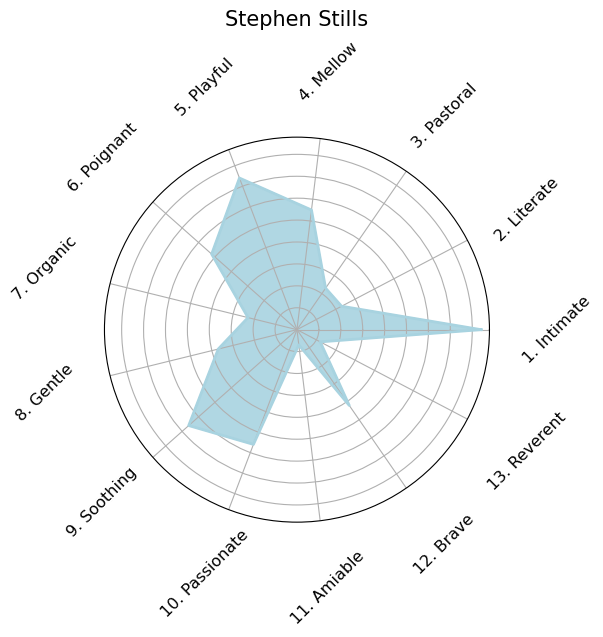

In [18]:
mood_mapping_ss = {
    "Mellow": ["Laid Back/Mellow", "Relaxed", "Soft/Quiet", "Meandering", "Freewheeling"],
    "Brave": ["Strong", "Bravado", "Confident", "Gutsy", "Gritty"],
    "Playful": ["Lively", "Playful", "Summery", "Rollicking", "Rousing", "Swaggering"],
    "Intimate": ["Intimate", "Reflective", "Sentimental", "Bittersweet"],
    "Soothing": ["Earthy", "Warm", "Autumnal", "Soothing"],
    "Gentle": ["Gentle", "Sweet", "Smooth"],
    "Poignant": ["Poignant", "Earnest", "Sparse"],
    "Amiable": ["Agreeable", "Amiable/Good Natured"],
    "Pastoral": ["Pastoral"],
    "Reverent": ["Reverent"],
    "Literate": ["Street-smart", "Literate"],
    "Passionate": ["Yearning", "Passionate", "Wistful", "Whimsical"],
    "Organic": ["Organic"]
}

create_radar_charts('Stephen Stills', mood_mapping_ss, color = '#A8D3E0')

### **Conclusion**:
Stephen Stills has a lot more contrasts in his work. He also deals with intimate and sad themes, but his music also relies on passionate and brave ones.

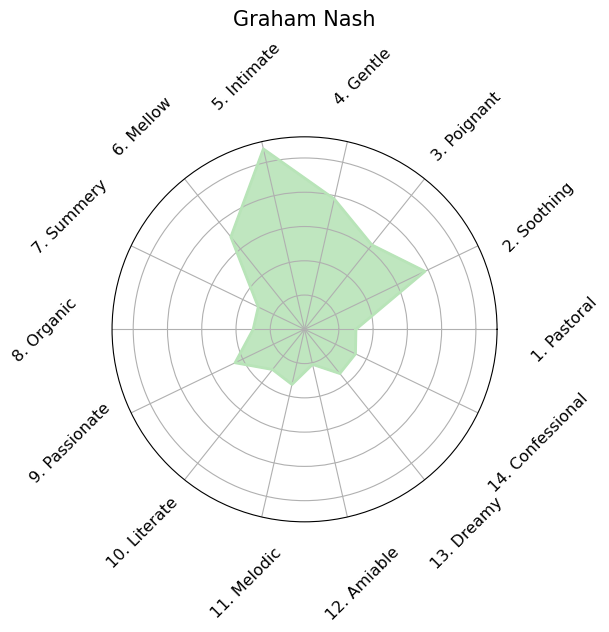

In [19]:
mood_mapping_gn = {
    "Intimate": ["Intimate", "Reflective", "Sentimental", "Nostalgic"],
    "Mellow": ["Relaxed", "Laid-Back/Mellow", "Calm/Peaceful"],
    "Soothing": ["Autumnal", "Warm", "Soothing"],
    "Gentle": ["Smooth", "Gentle", "Sweet"],
    "Poignant": ["Poignant", "Earnest", "Lonely"],
    "Organic": ["Organic"],
    "Pastoral": ["Pastoral"],
    "Passionate": ["Wistful", "Yearning"],
    "Amiable": ["Amiable/Good Natured", "Agreeable"],
    "Summery": ["Summery", "Springlike"],
    "Confessional": ["Strong", "Confessional"],
    "Dreamy": ["Dreamy", "Exploratory"],
    "Melodic": ["Melodic", "Flowing"],
    "Literate": ["Literate", "Poetic"]
}
create_radar_charts('Graham Nash', mood_mapping_gn, color = '#B8E4B8')

### **Conclusion**
Graham Nash mostly deals with topics about his own personality and tender, soothing and light moments.

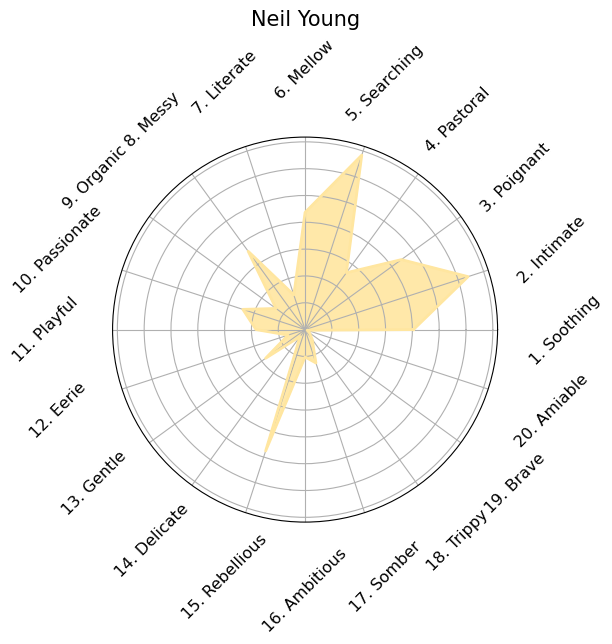

In [20]:
mood_mapping_ny = {
     "Soothing": ["Autumnal", "Earthy", "Warm", "Soothing"],
    "Intimate": ["Bittersweet", "Reflective", "Melancholy", "Intimate", "Self-Conscious", "Sentimental", "Nostalgic"],
    "Poignant": ["Plaintive", "Poignant", "Earnest", "Bleak", "Sparse"],
    "Pastoral": ["Pastoral", "Rustic"],
    "Searching": ["Searching", "Eccentric", "Quirky", "Nihilistic", "Angst-Ridden", "Dramatic", "Detached", "Cynical/Sarcastic", "Insular", "Cerebral", "Acerbic", "Difficult", "Cathartic", "Complex", "Brooding"],
    "Mellow": ["Laid-Back/Mellow", "Calm/Peaceful", "Relaxed", "Soft/Quiet", "Indulgent", "Meandering", "Volatile", "Freewheeling"],
    "Literate": ["Literate"],
    "Organic": ["Organic"],
    "Gentle": ["Gentle", "Sweet", "Smooth", "Light"],
    "Somber": ["Sad", "Somber", "Gloomy"],
    "Trippy": ["Druggie", "Trippy", "Atmospheric", "Hypnotic"],
    "Eerie": ["Eerie", "Spooky", "Nocturnal"],
    "Rebellious": ["Angry", "Bitter", "Outraged", "Aggressive", "Rowdy", "Ominous", "Harsh", "Confrontational", "Provocative", "Brash", "Suspenseful", "Urgent"],
    "Amiable": ["Amiable/Good-Natured"],
    "Passionate": ["Passionate", "Yearning", "Wistful"],
    "Brave": ["Gritty", "Gutsy"],
    "Playful": ["Playful", "Fun", "Rollicking", "Rousing", "Exuberant"],
    "Delicate": ["Delicate", "Refined"],
    "Messy": ["Ramshackle", "Lazy", "Weary", "Messy", "Brooding"],
    "Ambitious": ["Ambitious"],
    #"Sweeping": ["Sprawling"]
}
create_radar_charts('Neil Young', mood_mapping_ny, color = '#FFE6A0')

### **Conclusion**
Neil Young has the most individual moods compared to the other members. Out of over 80 moods, they are grouped into the most prominent 20. His opus varies from introspective, self-exploring to aggressive and rebellious themes, which can be seen on the radar chart itself, which takes on a sharp and starry appearance.

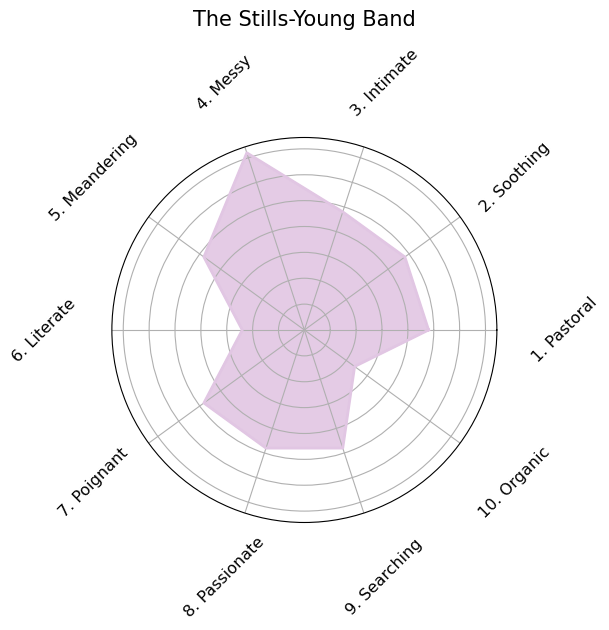

In [21]:
mood_mapping_sy = {
        'Pastoral' : ["Pastoral", "Rustic"],
        'Soothing': ["Autumnal", 'Earthy'],
        "Intimate" : ['Bittersweet', 'Intimate'],
        "Literate" : ['Literate'],
        'Poignant' : ["Poignant", 'Earnest'],
        'Passionate' : ["Wistful", 'Ambitious'],
        'Meandering' : ["Gentle","Meandering"],
        "Organic" : ['Organic'],
        'Messy' : ["Ramshackle", 'Messy', "Confrontational"],
        "Searching" : ['Searching', 'Complex']
}
create_radar_charts('The Stills-Young Band', mood_mapping_sy, '#E1C6E3')

### **Conclusion**
Songs from this group vary in several moods, such as light, messy, but also soothing.

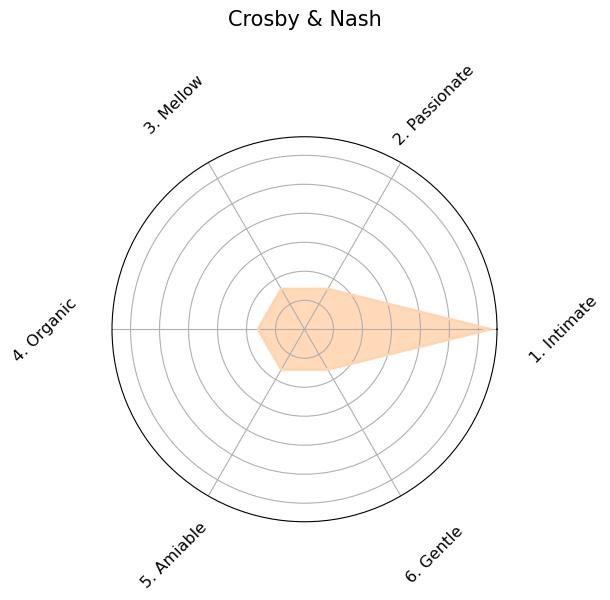

In [22]:
mood_mapping_cn = {
    "Earnest": ["Earnest, Plaintive"],
    "Intimate": ["Intimate", "Reflective", "Sentimental", "Bittersweet"],
    "Passionate": ["Wistful"],
    "Mellow": ["Laid-Back/Mellow"],
    "Organic": ["Organic"],
    "Amiable": ["Amiable/Good-Natured"],
    "Gentle": ["Gentle"]
}
create_radar_charts('Crosby & Nash', mood_mapping_cn, color = '#FFD5B1')


### **Conclusion**
Considering the small creative opus, the songs mostly focus on introspective topics, which can also refer to sentimental moments of the human personality.

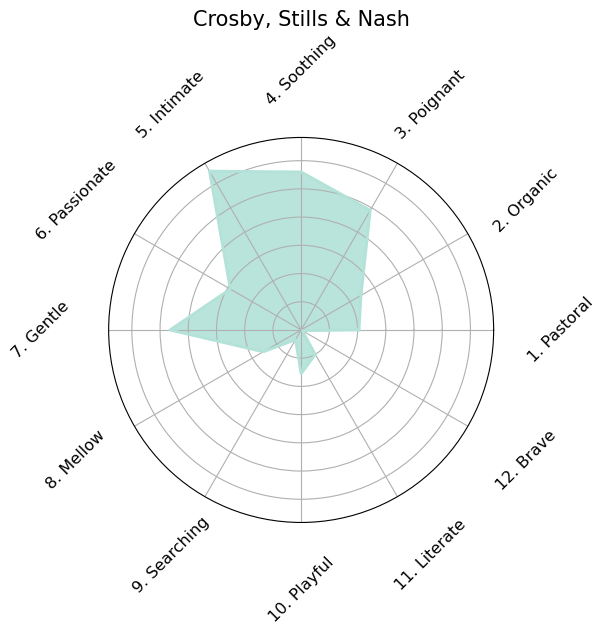

In [23]:
mood_mapping_csn = {
    "Pastoral": ["Pastoral"],
    "Searching": ["Searching"],
    "Organic": ["Organic"],
    "Poignant": ["Poignant", "Earnest"],
    "Soothing": ["Autumnal", "Warm", "Soothing"],
    "Gentle": ["Gentle", "Sweet", "Smooth"],
    "Intimate": ["Intimate", "Reflective", "Sentimental"],
    "Passionate": ["Wistful", "Yearning"],
    "Literate": ["Literate"],
    "Brave": ["Rousing"],
    "Playful": ["Summery"],
    "Amiable": ["Amiable/Good Natured"],
    "Mellow": ["Laid Back/Mellow", "Relaxed"]
}
create_radar_charts('Crosby, Stills & Nash', mood_mapping_csn, color = '#B2E2D8')

### **Conclusion**
CSN focuses on calming and, also, self-reflective emotions.

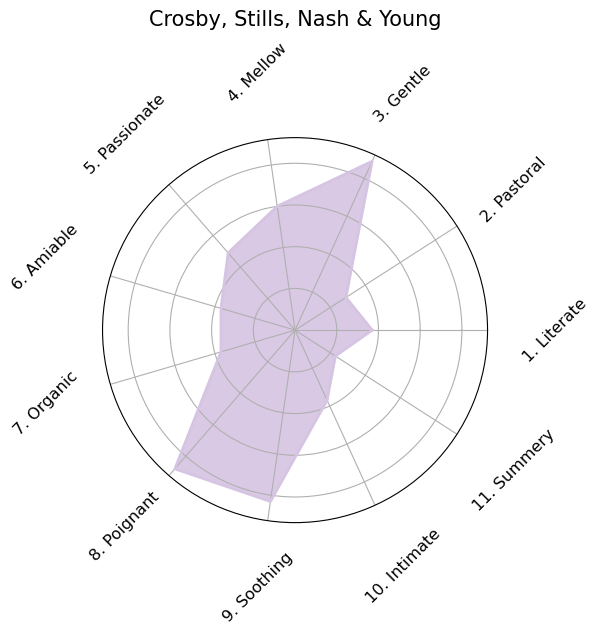

In [24]:
mood_mapping_csny = {
    "Literate": ["Literate"],
    "Pastoral": ["Pastoral"],
    "Gentle": ["Gentle", "Soft/Quiet", "Sweet", "Smooth"],
    "Mellow": ["Laid-Back/Mellow", "Relaxed"],
    "Amiable": ["Amiable/Good-Natured"],
    "Organic": ["Organic"],
    "Poignant": ["Poignant", "Earnest", "Plaintive", "Sparse"],
    "Intimate": ["Intimate", "Reflective" "Sentimental"],
    "Passionate": ["Wistful", "Yearning", "Whimsical"],
    "Soothing": ["Soothing", "Warm", "Autumnal"],
    "Summery": ["Summery"],
}
create_radar_charts('Crosby, Stills, Nash & Young', mood_mapping_csny, color = '#D6C4E3')

### **Conclusion**
CSNY mainly deals with tender, soothing, but also poignant topics.

### **Final conclusion**
Common emotions and moods, such as introspection, tenderness, and poignant notes of melancholy serve to inspire and connect the group members. Yet, each individual possesses a distinct identity, contributing unique perspectives and elements to the collective. Hypothesis 5 is accepted as true.

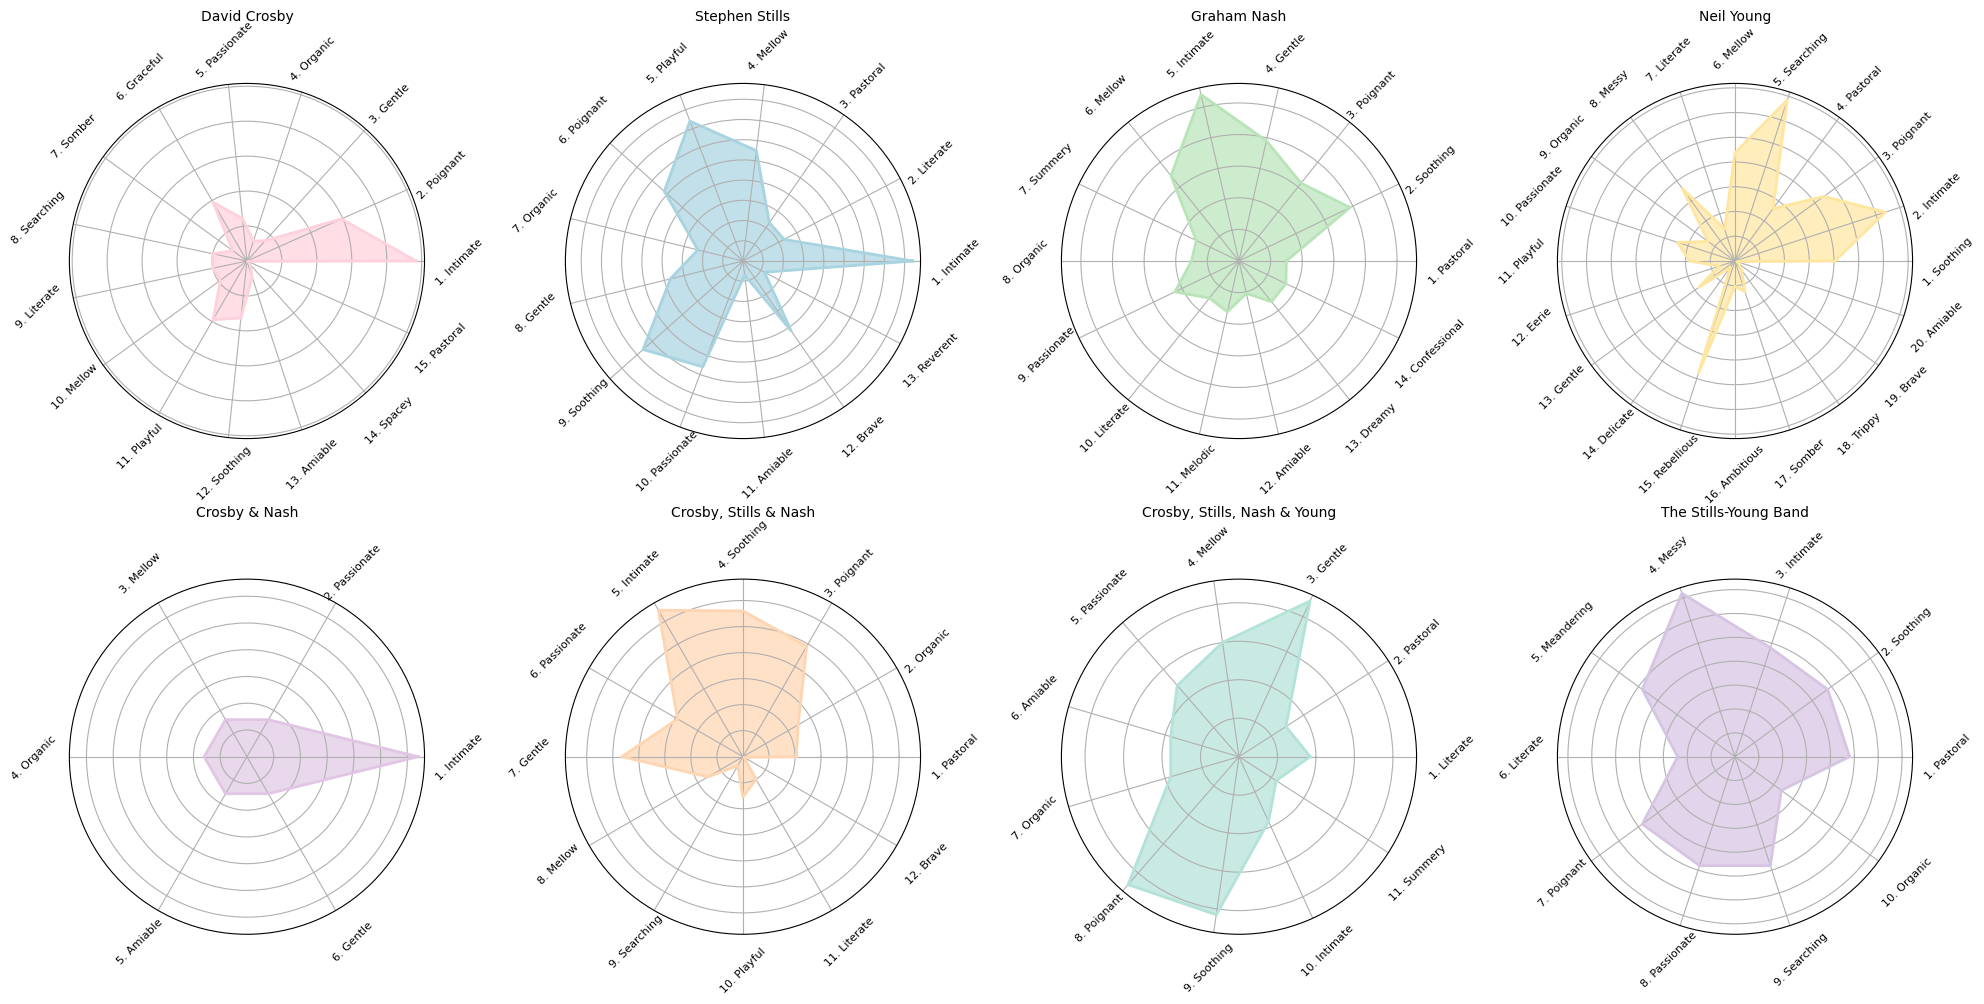

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def create_radar_chart(artist_name, mood_mapping, color, ax):
    artist_name = artist_name.strip()

    # Filter dataset for the artist
    albums = df[df['artist'].str.lower() == artist_name.lower()]

    # Remove NaN values
    album_moods = albums['album_moods'].replace('', float('NaN')).dropna()
    moods = []

    # Split album styles
    for album_mood in album_moods:
        moods.extend(str(album_mood).split(', '))

    grouped_moods = Counter()  # Group moods to calculate number of occurrences
    for mood in moods:
        for group, items in mood_mapping.items():
            if mood in items:
                grouped_moods[group] += 1
                break

    labels = list(grouped_moods.keys())
    frequencies = list(grouped_moods.values())

    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Create angles for radar chart

    frequencies += frequencies[:1]
    angles += angles[:1]

    # Create radar chart on the given axes
    ax.fill(angles, frequencies, color=color, alpha=0.7)
    ax.plot(angles, frequencies, color=color, linewidth=2)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    labeled_angles = [f"{i + 1}. {label}" for i, label in enumerate(labels)]
    ax.set_xticklabels(labeled_angles, fontsize=8)
    ax.tick_params(axis='x', rotation=45, pad=15)

    ax.set_title(artist_name, size=10, color='black', y=1.1, pad=20)

# List of artists and their corresponding colors
artists = [
    'David Crosby',
    'Stephen Stills',
    'Graham Nash',
    'Neil Young',
    'The Stills-Young Band'
    'Crosby & Nash',
    'CSN',
    'CSNY',
]
colors = ['#FFD1DC', '#A8D3E0', '#B8E4B8', '#FFE6A0', '#E1C6E3', '#FFD5B1', '#B2E2D8', '#D6C4E3']

# Create a figure with subplots for each artist
fig, axs = plt.subplots(2, 4, figsize=(20, 10), subplot_kw=dict(polar=True))

mood_mappings = {
    'David Crosby': mood_mapping_dc,
    'Stephen Stills': mood_mapping_ss,
    'Graham Nash': mood_mapping_gn,
    'Neil Young': mood_mapping_ny,
    'Crosby & Nash': mood_mapping_cn,
    'Crosby, Stills & Nash': mood_mapping_csn,
    'Crosby, Stills, Nash & Young': mood_mapping_csny,
    'The Stills-Young Band': mood_mapping_sy
}

artists = list(mood_mappings.keys())

for ax, artist_name, color in zip(axs.flatten(), artists, colors):
    create_radar_chart(artist_name, mood_mappings[artist_name], color, ax)

plt.tight_layout()
plt.show()
